<a href="https://colab.research.google.com/github/NineNattaya/229352-StatisticalLearning/blob/main/Lab06_SVM_660510737.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

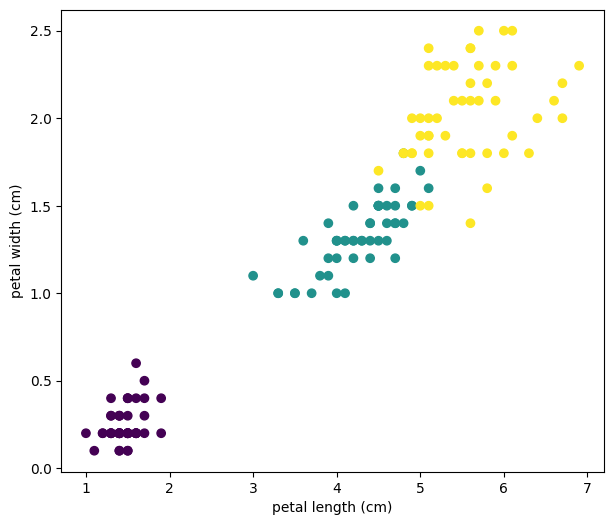

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [6]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

Training LinearSVC with C = 0.01


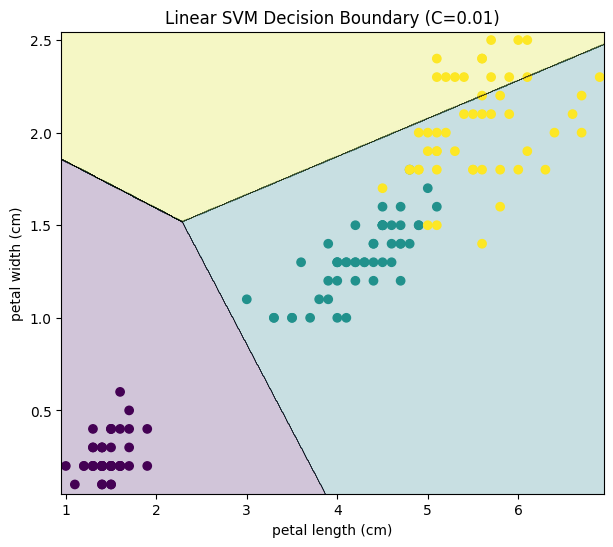

Training LinearSVC with C = 0.1


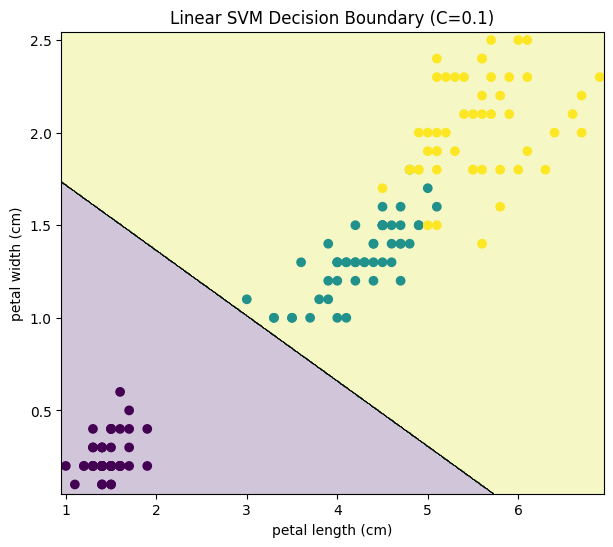

Training LinearSVC with C = 1.0


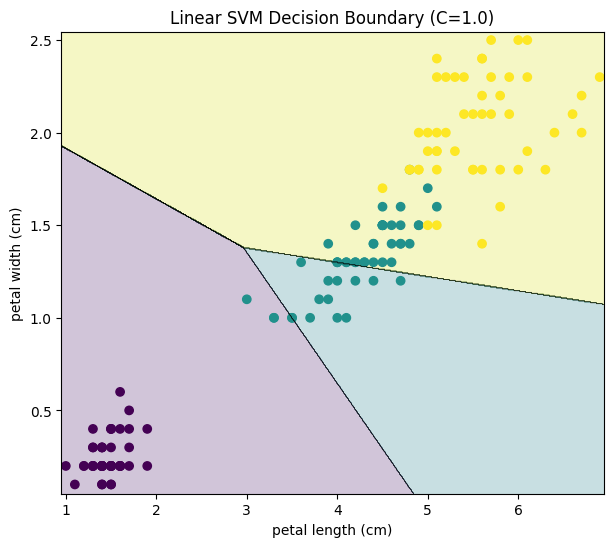

Training LinearSVC with C = 10.0


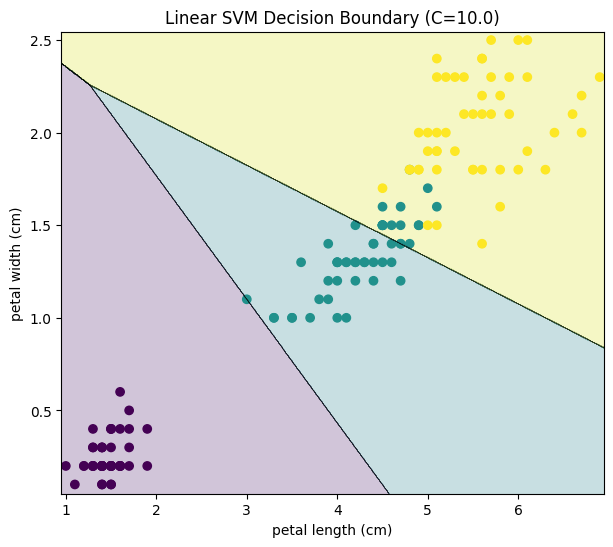

Training LinearSVC with C = 100.0


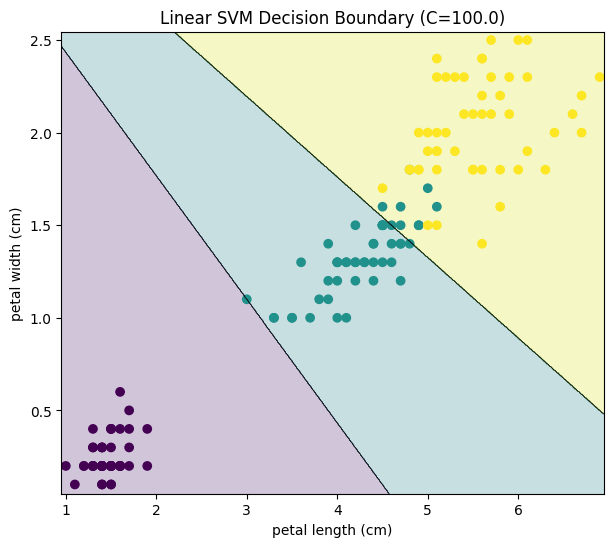

In [7]:
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for C in C_values:
    print(f"Training LinearSVC with C = {C}")
    svm_clf = LinearSVC(loss='hinge', C=C, random_state=42, max_iter=100000)
    svm_clf.fit(X_train, y_train)
    plot_decision_boundary(svm_clf, X, y)
    plt.title(f'Linear SVM Decision Boundary (C={C})')
    plt.show()

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [8]:
chosen_C = 1.0

svm_clf = LinearSVC(loss='hinge', C=chosen_C, random_state=42, max_iter=100000)
svm_clf.fit(X_train, y_train)

accuracy = svm_clf.score(X_test, y_test)
test_error = 1 - accuracy

print(f"Test error for LinearSVC with C = {chosen_C}: {test_error:.4f}")

Test error for LinearSVC with C = 1.0: 0.1667


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

Training SVC with gamma = 0.01


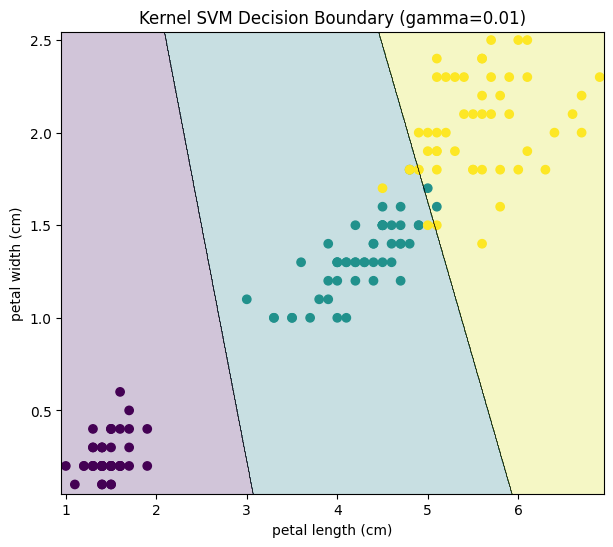

Training SVC with gamma = 0.1


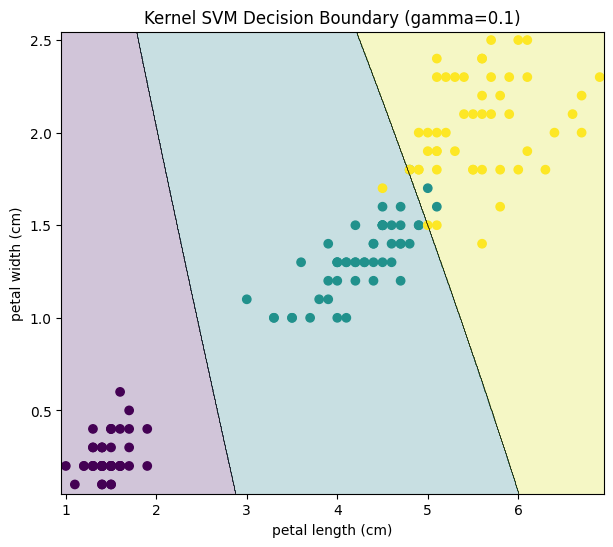

Training SVC with gamma = 1.0


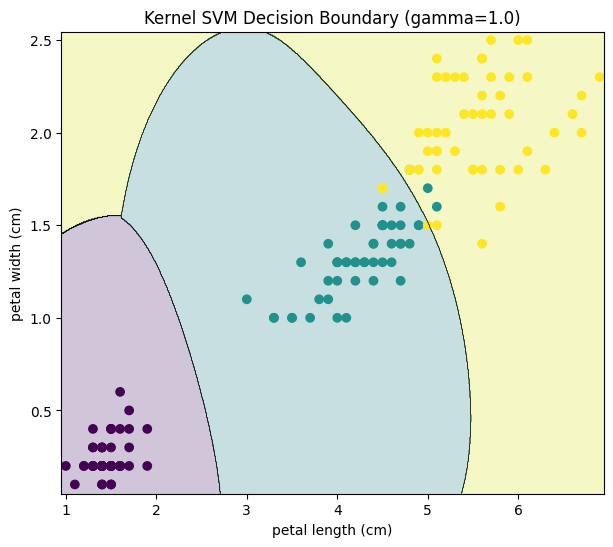

Training SVC with gamma = 10.0


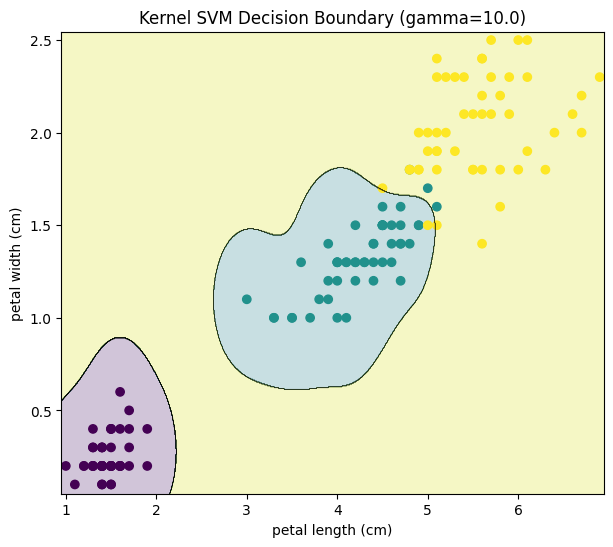

Training SVC with gamma = 100.0


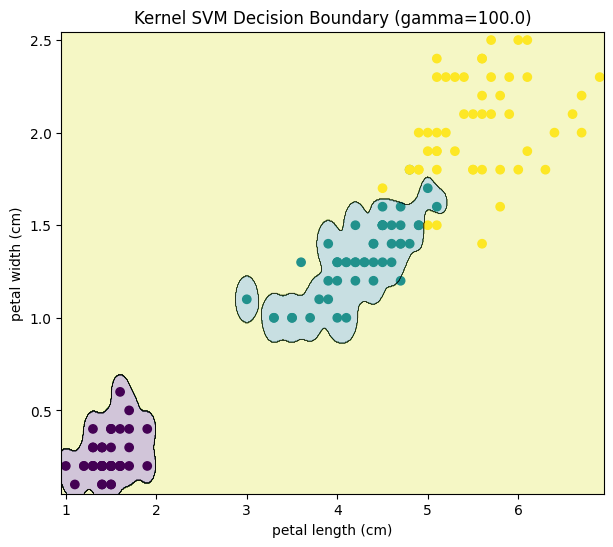

In [9]:
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]
C = 1.0

for gamma in gamma_values:
    print(f"Training SVC with gamma = {gamma}")
    svm_clf = SVC(kernel='rbf', gamma=gamma, C=C, random_state=42)
    svm_clf.fit(X_train, y_train)
    plot_decision_boundary(svm_clf, X, y)
    plt.title(f'Kernel SVM Decision Boundary (gamma={gamma})')
    plt.show()

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [10]:
chosen_gamma = 1.0
chosen_C_svc = 1.0

svm_clf_kernel = SVC(kernel='rbf', gamma=chosen_gamma, C=chosen_C_svc, random_state=42)
svm_clf_kernel.fit(X_train, y_train)

accuracy_kernel = svm_clf_kernel.score(X_test, y_test)
test_error_kernel = 1 - accuracy_kernel

n_support_vectors = svm_clf_kernel.support_vectors_.shape[0]

print(f"Test error for Kernel SVC with gamma = {chosen_gamma} and C = {chosen_C_svc}: {test_error_kernel:.4f}")
print(f"Number of support vectors: {n_support_vectors}")

Test error for Kernel SVC with gamma = 1.0 and C = 1.0: 0.0000
Number of support vectors: 30


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

**ตอบ**
1. Explain using test accuracy:

Linear SVM (เมื่อ C = 1.0) มีค่า Test Error อยู่ที่ 0.1667 ในขณะที่ Kernel SVM (เมื่อ gamma = 1.0 และ C = 1.0) มีค่า Test Error อยู่ที่ 0.0000 ซึ่งแสดงว่า Kernel SVM มีประสิทธิภาพที่ดีกว่าบน Test Set

2. Explaing using decision boundary plot:

เมื่อดูจากรูปภาพแสดงขอบเขตการตัดสินใจ:

สำหรับ Linear SVM ขอบเขตการตัดสินใจจะเป็นเส้นตรง แม้ว่าจะสามารถแยกคลาสได้ในระดับหนึ่ง แต่ก็ยังมีการทับซ้อนกันระหว่างคลาส versicolor และ virginica ซึ่งสะท้อนออกมาในค่า Test Error ที่ไม่เป็นศูนย์
สำหรับ Kernel SVM (เมื่อ gamma = 1.0) ขอบเขตการตัดสินใจไม่ใช่เส้นตรงและสามารถแยกคลาสได้อย่างมีประสิทธิภาพมากขึ้น รวมถึงคลาส versicolor และ virginica ที่ค่อนข้างซ้อนทับกัน ซึ่งสอดคล้องกับค่า Test Error ที่ต่ำกว่าของ Kernel SVM
ดังนั้น จากการพิจารณาทั้งความแม่นยำในการทดสอบและรูปภาพแสดงขอบเขตการตัดสินใจ Kernel SVM ที่ใช้ RBF kernel และมี hyperparameters ที่เหมาะสม (เช่น gamma = 1.0 และ C = 1.0) จะเป็นตัวเลือกที่ดีกว่า Linear SVM สำหรับการจำแนกข้อมูล Iris เนื่องจากสามารถจับความสัมพันธ์ที่ไม่เป็นเชิงเส้นระหว่างคุณลักษณะและคลาสได้อย่างมีประสิทธิภาพมากกว่าครับ